# Investigating the Correlation Between Homeless Population Density and Emergency Health Service Utilization Across Metro Vancouver
- Group Members: Miguel Kuzma, Akshay Tripathi, Ken Xu
- Course: SCIE 300

# Abstract

**Context**
Homelessness in Metro Vancouver is an increasingly critical public health issue that affects more than just social welfare. As the unhoused population changes across the region, it is important to understand how this impacts the demand for essential emergency infrastructure.

**Objective**
The primary objective of this study is to examine the relationship between homeless population density and emergency health service utilization at the municipal level. We aimed to determine if higher rates of homelessness are statistically linked to higher call volumes or slower ambulance response times.

**Data and Methods**
This study utilized an observational and comparative approach to analyze six municipalities within Metro Vancouver. We sourced secondary data from official government and health authority reports regarding homelessness counts, emergency response statistics, and census population numbers. To ensure the comparison was accurate across cities of different sizes, all variables were normalized to a rate per 1,000 residents. We then performed Pearson correlation analyses on data from 2020, 2023, and 2025 to identify potential linear relationships.

**Results**
The analysis indicated a strong positive correlation between homeless population density and the volume of emergency calls per capita. Municipalities with higher densities of unhoused residents consistently showed higher demands on the emergency system. However, the study did not find a statistically significant relationship between homelessness density and median ambulance response times. It is important to note that there was considerable variability in the data across different municipalities, which suggests that other local factors and errors in point-in-time counting may influence these results.

**Implications**
These findings highlight the connection between housing stability and public health resources. The results suggest that high emergency call volumes are closely tied to housing insecurity, even if response times are currently being managed through triage protocols. This analysis supports the view that targeted housing interventions could be a practical strategy for managing the load on emergency medical services.

# INTRODUCTION:
Homelessness in British Columbia has become an increasingly visible and serious issue in Metro Vancouver. It can be argued that this is mainly a housing and social policy problem, however, it is important to note that it also has great implications for public health. Those without stable housing are at higher risks of injury and illness, this is only exacerbated by environmental factors like the cold or rain. Moreover, limited access to hygiene and medical facilities as well as the higher rates of substance-related injuries. These pre-existing conditions are reason to make emergency medical services a crucial part of the health care system

Additionally, due to the recent virulent drug crisis, the demands for emergency services in British Columbia have increased. This rampant substance crisis in unhoused populations should be sufficient to relate the situation to emergency medical services, unfortunately however, that is not the case. Municipalities would greatly benefit from a better understanding of the existing correlation between emergency medical services utilization and the number of unhoused populations within their cities. 

The purpose of this study is to analyze whether homeless population densities in Metro Vancouver are associated with increased emergency medical service utilization within the municipalities studied. We are specifically investigating whether the municipalities with higher homelessness rates experience higher emergency call volumes and if this will also correlate with ambulance response times within the city. We hypothesize that municipalities with greater homeless populations experience longer response times.

# METHODOLOGY:
## Study Design

This is an observational, comparative research study utilizing secondary data. The analysis was conducted via a cross-sectional approach at the municipal level.

## Study Area
* **Metro Vancouver municipalities:** Vancouver, West Vancouver, Richmond, Burnaby, Surrey.
* **Interior comparison:** Kelowna was included to compare Lower Mainland patterns with a British Columbia interior municipality.

*Selection Rationale:* These municipalities were chosen to capture variation in population sizes, homelessness rates, and socioeconomic backgrounds.

## Data Sources
**1. Emergency Health Service Data**
* **Source:** BCEHS Open Data dataset (`bcehs-wait-times.csv`)
* **Key Variables:**
    * Total emergency event volumes
    * Median response times
    * Focus on "purple" and "red" (life-threatening) calls

**2. Homelessness Data**
* Metro Vancouver Homeless Count report (2020, 2023)
* HSA BC Preliminary Data Report (2025)

**3. Population Data**
* Statistics Canada 2021 Census municipal profiles

*Note: All datasets are sourced from official government bodies or health authorities.*

## Variables

### Independent Variable
* **Homeless population/density:** Individuals per 1,000 residents.

### Dependent Variables
* **Emergency call volume:** Per 1,000 residents.
* **Median ambulance response time:** Specifically for life-threatening calls.

### Normalization Variable
* Total municipal population.

## Data Processing
To ensure fair comparisons between different municipalities, the following steps were taken:
1.  **Normalization:** Raw counts were converted to per-capita values (per 1,000 residents).
2.  **Sorting:** The dataset was sorted by municipality and the closest available years (2020, 2023, 2025).
3.  **Cleaning:** Data was cleaned to guarantee consistent units and categories.
4.  **Calculation:** Homeless density was calculated using point-in-time counts divided by the municipal population.

## Statistical Analysis
* **Descriptive Statistics:** Calculated by year and municipality for every variable.
* **Visualization:** Scatter plots were generated to visualize relationships between:
    * Homeless population density and emergency call volume.
    * Homeless population density and median response time.
* **Correlation:** Pearson’s correlation coefficients were used to evaluate linear relationships.
* **Significance:** Statistical significance was evaluated using $\alpha = 0.05$.
* **Trends:** Longitudinal trends were examined for the major municipalities.
* **Tools:** All data processing, analysis, and visualization were performed in Python.

## Limitations
* **Underestimation:** Point-in-time homeless counts likely underestimate the actual unhoused population.
* **Temporal Mismatches:** There may be discrepancies between homelessness data and emergency service datasets due to different reporting times.
* **Geographic Factors:** We did not account for geographic differences in ambulance station locations which cannot be controlled for in this analysis.
* **Data Availability:** Not all reports may be strictly from 2025.


In [7]:
!mamba install pandas numpy matplotlib seaborn scipy

mambajs 0.19.13

Specs: xeus-python, numpy, matplotlib, pillow, ipywidgets>=8.1.6, ipyleaflet, scipy, pandas, seaborn
Channels: emscripten-forge, conda-forge

Solving environment...
Solving took 2.1774000000059606 seconds
All requested packages already installed.


1. Creating Manual Homelessness Table...
2. Loading Ambulance Data...
3. Merging Data...
--- FINAL DATA TABLE ---


,Community,Year,Homeless_Count,Response_Minutes,Calls_Per_1000
0,Vancouver,2020,2095,8.250000,121.605501
1,Vancouver,2023,2420,10.866667,128.297858
2,Vancouver,2025,2715,10.683333,128.545500
3,Surrey,2020,644,9.750000,88.641650
4,Surrey,2023,1060,12.466667,87.531364
5,Surrey,2025,1155,12.400000,93.320336
6,Burnaby,2020,150,10.566667,71.161064
7,Burnaby,2023,235,13.766667,72.232815
8,Burnaby,2025,256,13.283333,75.897642
9,Richmond,2020,85,10.566667,57.688735


Plot


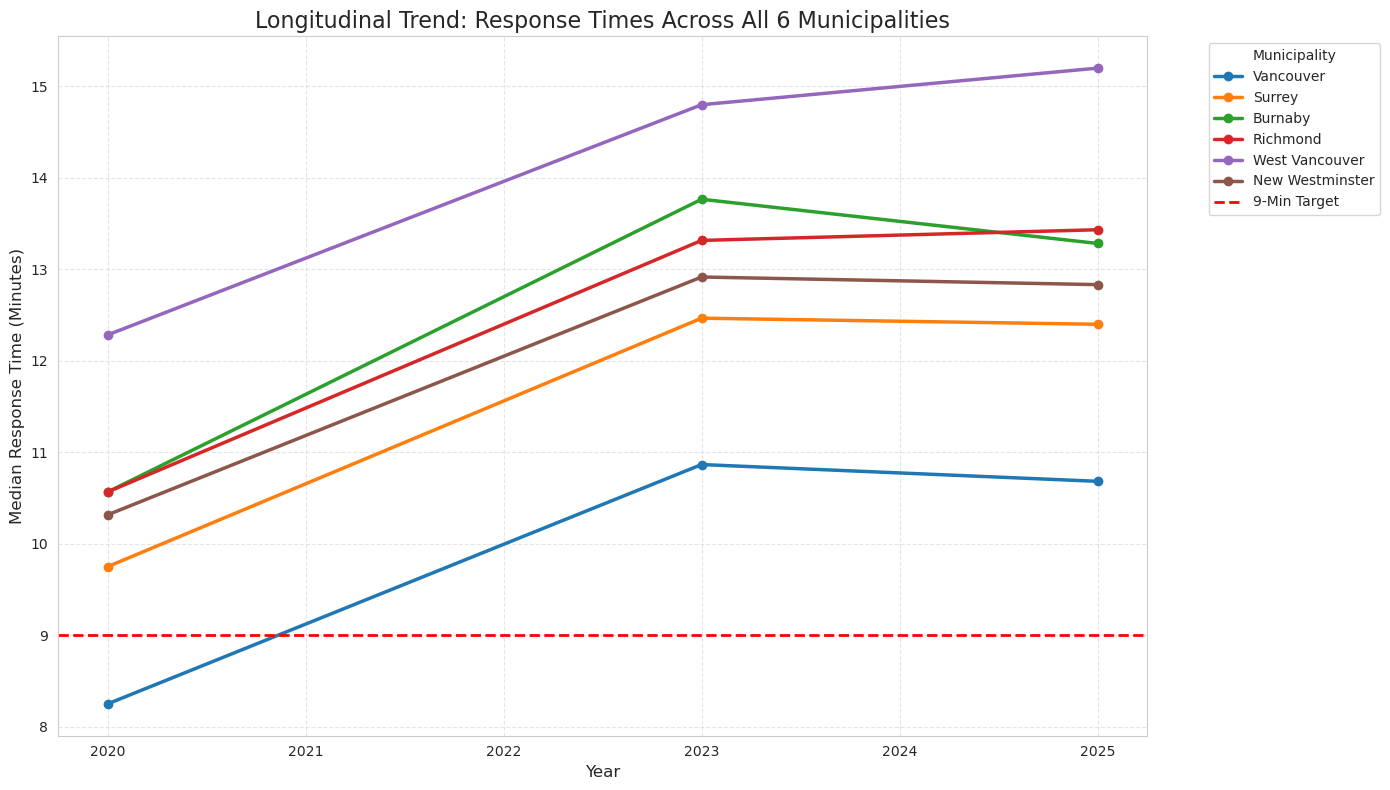

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set style
sns.set_style("whitegrid")

# ==========================================
# PART 1: RE-CREATE THE MANUAL DATA TABLE
# ==========================================
print("1. Creating Manual Homelessness Table...")
data_manual = {
    'Community': ['Vancouver', 'Vancouver', 'Vancouver', 
                  'Surrey', 'Surrey', 'Surrey', 
                  'Burnaby', 'Burnaby', 'Burnaby',
                  'Richmond', 'Richmond', 'Richmond',
                  'West Vancouver', 'West Vancouver', 'West Vancouver',
                  'New Westminster', 'New Westminster', 'New Westminster'],
    'Year': [2020, 2023, 2025] * 6,
    'Homeless_Count': [2095, 2420, 2715,  # Vancouver
                       644, 1060, 1155,   # Surrey
                       150, 235, 256,     # Burnaby
                       85, 162, 176,      # Richmond
                       60, 60, 65,        # West Van
                       115, 203, 221],    # New West
    'Population': [662248]*3 + [568322]*3 + [249125]*3 + [209937]*3 + [44122]*3 + [78916]*3
}
df_final = pd.DataFrame(data_manual)

# ==========================================
# PART 2: LOAD & CLEAN AMBULANCE CSV
# ==========================================
print("2. Loading Ambulance Data...")
try:
    df_bcehs = pd.read_csv("bcehs-wait-times.csv")
    
    # Filter for our cities
    focus_cities = ['Vancouver', 'Surrey', 'Burnaby', 'Richmond', 'West Vancouver', 'New Westminster']
    df_bcehs = df_bcehs[df_bcehs['community'].isin(focus_cities)].copy()

    # Clean numbers (remove commas)
    target_col = 'media-seconds-red_purple'
    if 'median-seconds-red_purple' in df_bcehs.columns:
        target_col = 'median-seconds-red_purple'

    for col in ['events-total', target_col]:
        if df_bcehs[col].dtype == 'object':
            df_bcehs[col] = df_bcehs[col].str.replace(',', '')
        df_bcehs[col] = pd.to_numeric(df_bcehs[col], errors='coerce')

    df_bcehs.rename(columns={target_col: 'Median_Seconds', 'events-total': 'Total_Events'}, inplace=True)

except FileNotFoundError:
    print("ERROR: bcehs-wait-times.csv not found. Please upload it to the same folder!")

# ==========================================
# PART 3: MERGE DATASETS
# ==========================================
print("3. Merging Data...")

def get_metrics(row):
    # Find matching row in ambulance data
    match = df_bcehs[(df_bcehs['community'] == row['Community']) & (df_bcehs['year'] == row['Year'])]
    
    # Proxy: If 2025 is missing, use 2024
    if match.empty and row['Year'] == 2025:
         match = df_bcehs[(df_bcehs['community'] == row['Community']) & (df_bcehs['year'] == 2024)]
    
    if not match.empty:
        return pd.Series([match.iloc[0]['Median_Seconds'], match.iloc[0]['Total_Events']])
    return pd.Series([None, None])

# Apply merge
df_final[['Response_Seconds', 'Total_Calls']] = df_final.apply(get_metrics, axis=1)

# Normalize Data
df_final['Response_Minutes'] = df_final['Response_Seconds'] / 60
df_final['Homeless_Per_1000'] = (df_final['Homeless_Count'] / df_final['Population']) * 1000
df_final['Calls_Per_1000'] = (df_final['Total_Calls'] / df_final['Population']) * 1000

# Remove rows with missing data
df_final.dropna(inplace=True)

# Print Table
print("--- FINAL DATA TABLE ---")
pd.set_option('display.max_rows', None)
try:
    from IPython.display import display
    display(df_final[['Community', 'Year', 'Homeless_Count', 'Response_Minutes', 'Calls_Per_1000']])
except:
    print(df_final[['Community', 'Year', 'Homeless_Count', 'Response_Minutes', 'Calls_Per_1000']])
pd.reset_option('display.max_rows')

# ==========================================
# PART 4: PLOT ALL CITIES (Longitudinal)
# ==========================================
print("Plot")
plt.figure(figsize=(14, 8))

# Loop through each city to plot its line
for city in df_final['Community'].unique():
    subset = df_final[df_final['Community'] == city]
    plt.plot(subset['Year'], subset['Response_Minutes'], marker='o', linewidth=2.5, label=city)

plt.axhline(y=9, color='red', linestyle='--', linewidth=2, label='9-Min Target')
plt.title('Longitudinal Trend: Response Times Across All 6 Municipalities', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Median Response Time (Minutes)', fontsize=12)
plt.legend(title="Municipality", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Merging cleaned data
--- STATISTICAL RESULTS ---
1. Correlation (Homeless Density vs CALL VOLUME): r = 0.8775, p = 0.0000
2. Correlation (Homeless Density vs RESPONSE TIME): r = -0.3052, p = 0.2181


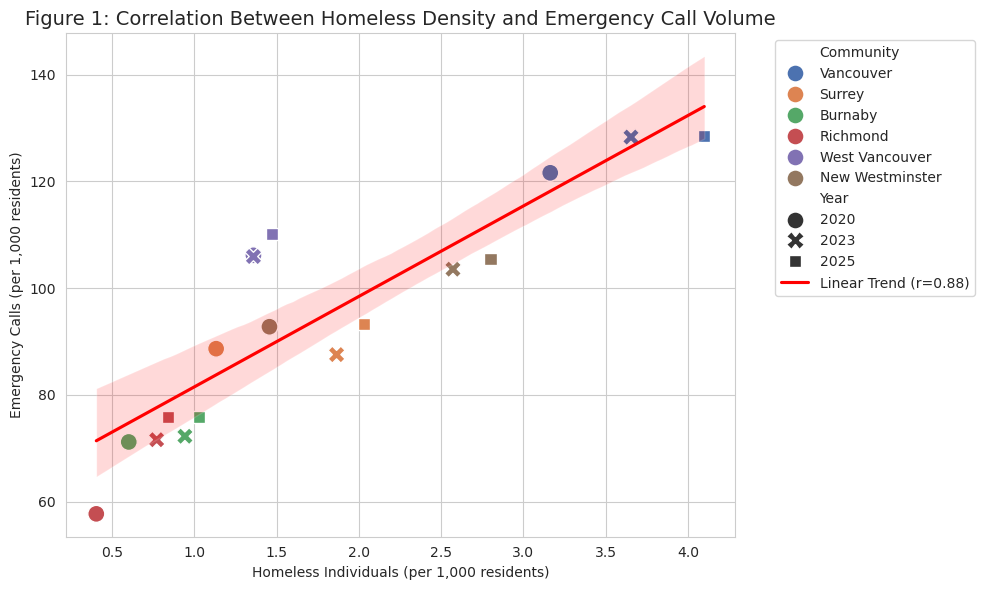

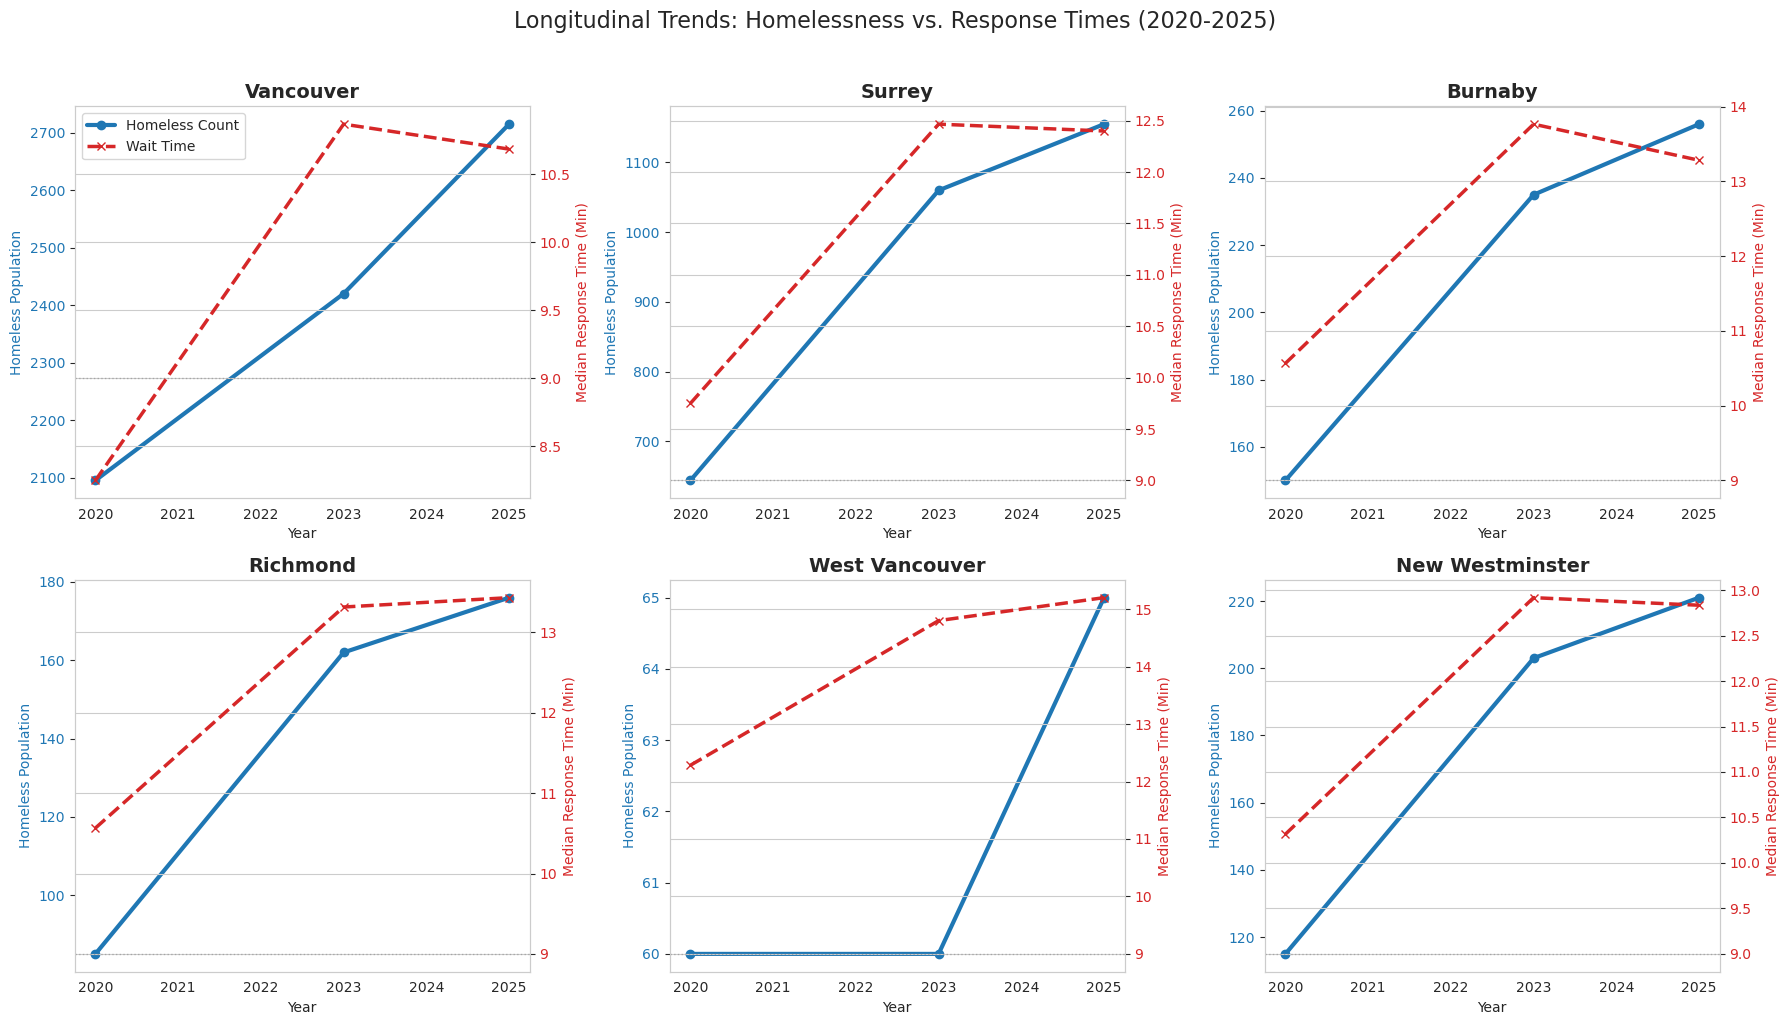

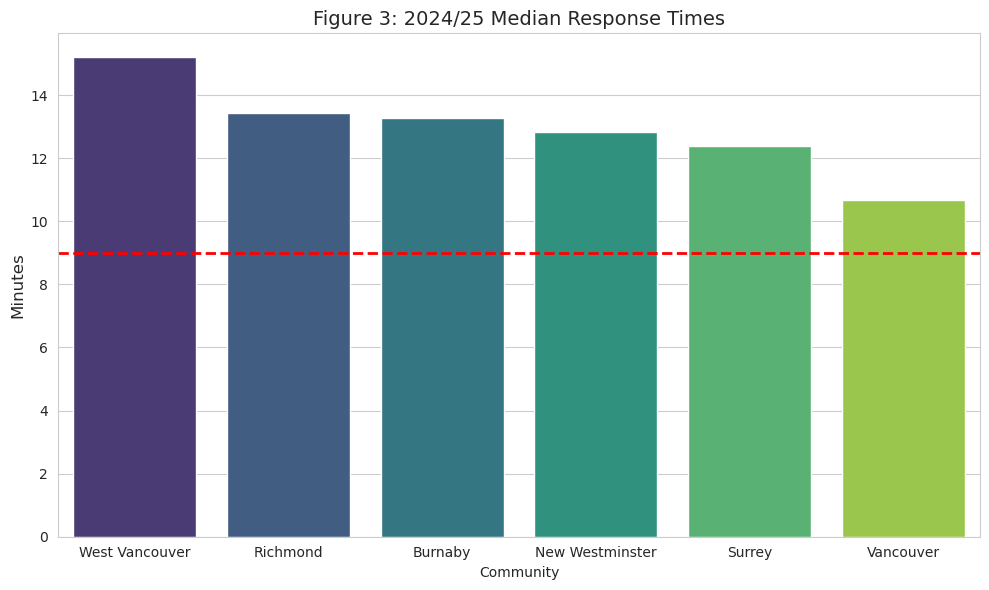

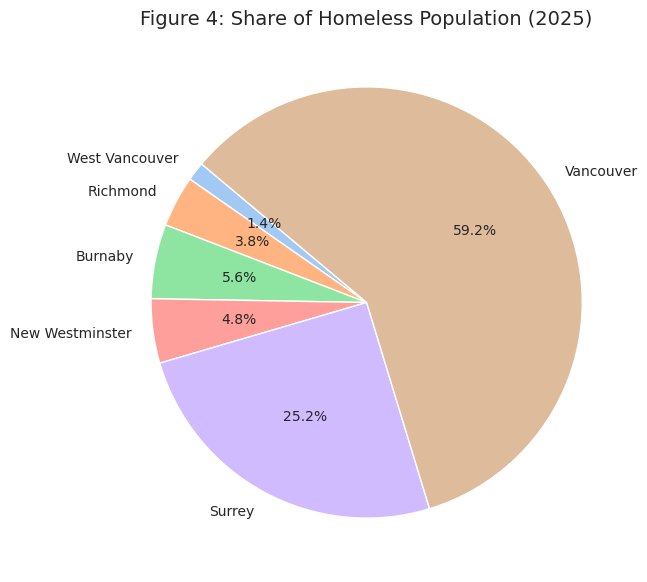

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# ==========================================
# 1. LOAD AND CLEAN THE RAW BCEHS DATA
# ==========================================
# Load the CSV
try:
    df_bcehs = pd.read_csv("bcehs-wait-times.csv")
except FileNotFoundError:
    print("Error: bcehs-wait-times.csv not found.")

# Filter for our 6 specific study cities
focus_cities = ['Vancouver', 'Surrey', 'Burnaby', 'Richmond', 'West Vancouver', 'New Westminster']
df_bcehs = df_bcehs[df_bcehs['community'].isin(focus_cities)].copy()

# CLEANING: Fix formatting (remove commas) and standardizing column names
target_col = 'media-seconds-red_purple'
if 'median-seconds-red_purple' in df_bcehs.columns:
    target_col = 'median-seconds-red_purple'

for col in ['events-total', target_col]:
    if df_bcehs[col].dtype == 'object':
        df_bcehs[col] = df_bcehs[col].str.replace(',', '')
    df_bcehs[col] = pd.to_numeric(df_bcehs[col], errors='coerce')

df_bcehs.rename(columns={target_col: 'Median_Seconds', 'events-total': 'Total_Events'}, inplace=True)

# ==========================================
# 2. MERGE DATASETS
# ==========================================
# This function matches your Manual Table (df_final) with the Ambulance Data (df_bcehs)
def get_metrics(row):
    match = df_bcehs[(df_bcehs['community'] == row['Community']) & (df_bcehs['year'] == row['Year'])]
    
    # Proxy Logic: If 2025 is missing, use 2024
    if match.empty and row['Year'] == 2025:
         match = df_bcehs[(df_bcehs['community'] == row['Community']) & (df_bcehs['year'] == 2024)]
    
    if not match.empty:
        return pd.Series([match.iloc[0]['Median_Seconds'], match.iloc[0]['Total_Events']])
    return pd.Series([None, None])

# Apply the merge
print("Merging cleaned data")
df_final[['Response_Seconds', 'Total_Calls']] = df_final.apply(get_metrics, axis=1)

# CALCULATE DENSITIES (Normalization)
df_final['Response_Minutes'] = df_final['Response_Seconds'] / 60
df_final['Homeless_Per_1000'] = (df_final['Homeless_Count'] / df_final['Population']) * 1000
df_final['Calls_Per_1000'] = (df_final['Total_Calls'] / df_final['Population']) * 1000

# Remove empty rows to avoid errors
df_final.dropna(inplace=True)

# ==========================================
# 3. STATISTICAL ANALYSIS
# ==========================================
corr_vol, p_vol = stats.pearsonr(df_final['Homeless_Per_1000'], df_final['Calls_Per_1000'])
corr_time, p_time = stats.pearsonr(df_final['Homeless_Per_1000'], df_final['Response_Minutes'])

print("--- STATISTICAL RESULTS ---")
print(f"1. Correlation (Homeless Density vs CALL VOLUME): r = {corr_vol:.4f}, p = {p_vol:.4f}")
print(f"2. Correlation (Homeless Density vs RESPONSE TIME): r = {corr_time:.4f}, p = {p_time:.4f}")

# ==========================================
# 4. PLOTTING
# ==========================================
sns.set_style("whitegrid")

# FIG 1: Scatter Plot (Call Volume)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_final, x='Homeless_Per_1000', y='Calls_Per_1000', hue='Community', style='Year', s=150, palette='deep')
sns.regplot(data=df_final, x='Homeless_Per_1000', y='Calls_Per_1000', scatter=False, color='red', label=f'Linear Trend (r={corr_vol:.2f})')
plt.title('Figure 1: Correlation Between Homeless Density and Emergency Call Volume', fontsize=14)
plt.xlabel('Homeless Individuals (per 1,000 residents)')
plt.ylabel('Emergency Calls (per 1,000 residents)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for professional look
sns.set_style("whitegrid")

# ==========================================
# 1. SETUP DATA (Manual + CSV Load)
# ==========================================
# Re-defining data to ensure it runs standalone
data_manual = {
    'Community': ['Vancouver', 'Vancouver', 'Vancouver', 
                  'Surrey', 'Surrey', 'Surrey', 
                  'Burnaby', 'Burnaby', 'Burnaby',
                  'Richmond', 'Richmond', 'Richmond',
                  'West Vancouver', 'West Vancouver', 'West Vancouver',
                  'New Westminster', 'New Westminster', 'New Westminster'],
    'Year': [2020, 2023, 2025] * 6,
    'Homeless_Count': [2095, 2420, 2715, 644, 1060, 1155, 150, 235, 256, 
                       85, 162, 176, 60, 60, 65, 115, 203, 221],
    'Population': [662248]*3 + [568322]*3 + [249125]*3 + [209937]*3 + [44122]*3 + [78916]*3
}
df_final = pd.DataFrame(data_manual)

# Load CSV
try:
    df_bcehs = pd.read_csv("bcehs-wait-times.csv")
    
    # Cleaning
    focus_cities = ['Vancouver', 'Surrey', 'Burnaby', 'Richmond', 'West Vancouver', 'New Westminster']
    df_bcehs = df_bcehs[df_bcehs['community'].isin(focus_cities)].copy()
    
    target_col = 'media-seconds-red_purple'
    if 'median-seconds-red_purple' in df_bcehs.columns: target_col = 'median-seconds-red_purple'
    
    for col in ['events-total', target_col]:
        if df_bcehs[col].dtype == 'object': df_bcehs[col] = df_bcehs[col].str.replace(',', '')
        df_bcehs[col] = pd.to_numeric(df_bcehs[col], errors='coerce')
        
    df_bcehs.rename(columns={target_col: 'Median_Seconds'}, inplace=True)

    # Merge Logic
    def get_metrics(row):
        match = df_bcehs[(df_bcehs['community'] == row['Community']) & (df_bcehs['year'] == row['Year'])]
        if match.empty and row['Year'] == 2025:
             match = df_bcehs[(df_bcehs['community'] == row['Community']) & (df_bcehs['year'] == 2024)]
        if not match.empty: return match.iloc[0]['Median_Seconds']
        return None

    df_final['Response_Seconds'] = df_final.apply(get_metrics, axis=1)
    df_final['Response_Minutes'] = df_final['Response_Seconds'] / 60
    df_final.dropna(inplace=True)

except:
    print("Warning: CSV not found. Ensure 'bcehs-wait-times.csv' is in the folder.")

# ==========================================
# 2. GENERATE THE 2x3 GRID PLOT
# ==========================================

# Create a figure with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten() # Flattens the 2D grid into a 1D list for easy looping

# List of cities to iterate through
cities = df_final['Community'].unique()

for i, city in enumerate(cities):
    ax1 = axes[i]
    subset = df_final[df_final['Community'] == city]
    
    # --- LEFT AXIS: Homeless Count (Blue) ---
    color1 = 'tab:blue'
    line1 = ax1.plot(subset['Year'], subset['Homeless_Count'], marker='o', 
                     color=color1, linewidth=3, label='Homeless Count')
    ax1.set_xlabel('Year', fontsize=10)
    ax1.set_ylabel('Homeless Population', color=color1, fontsize=10)
    ax1.tick_params(axis='y', labelcolor=color1)
    ax1.set_title(f"{city}", fontsize=14, fontweight='bold')
    ax1.grid(False) # Turn off grid for cleanliness on dual axis
    
    # --- RIGHT AXIS: Response Time (Red) ---
    ax2 = ax1.twinx()
    color2 = 'tab:red'
    line2 = ax2.plot(subset['Year'], subset['Response_Minutes'], marker='x', linestyle='--', 
                     color=color2, linewidth=2.5, label='Wait Time')
    ax2.set_ylabel('Median Response Time (Min)', color=color2, fontsize=10)
    ax2.tick_params(axis='y', labelcolor=color2)
    
    # Optional: Force the 9-min target line on the right axis
    ax2.axhline(y=9, color='gray', linestyle=':', alpha=0.5, linewidth=1)

    # Combined Legend for the first plot only (to avoid clutter)
    if i == 0:
        lines = line1 + line2
        labels = [l.get_label() for l in lines]
        ax1.legend(lines, labels, loc='upper left', frameon=True)

# Adjust layout to prevent overlap
plt.suptitle('Longitudinal Trends: Homelessness vs. Response Times (2020-2025)', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# FIG 3: Bar Chart (2025)
df_2025 = df_final[df_final['Year'] == 2025].sort_values('Response_Minutes', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=df_2025, x='Community', y='Response_Minutes', hue='Community', palette='viridis', legend=False)
plt.axhline(y=9, color='red', linestyle='--', linewidth=2, label='9-Min Target')
plt.title('Figure 3: 2024/25 Median Response Times', fontsize=14)
plt.ylabel('Minutes', fontsize=12)
plt.tight_layout()
plt.show()

# FIG 4: Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(df_2025['Homeless_Count'], labels=df_2025['Community'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Figure 4: Share of Homeless Population (2025)', fontsize=14)
plt.show()

# Results:
## Dataset Overview
The final dataset included 6 municipalities across 3 discrete time points: 2020, 2023, and 2025.

**Key Variables:**
* Homeless population count (and density per 1,000 residents)
* Emergency call volume per 1,000 residents
* Median ambulance response time (minutes)

## Homeless Population Density Patterns
* **Vancouver:** Consistently exhibited the highest homelessness density, increasing from **3.16** to **4.10** individuals per 1,000 residents between 2020 and 2025.
* **West Vancouver:** Maintained the lowest homelessness density, remaining stable at approximately **0.5** individuals per 1,000 residents.

**Total Share of Homeless Population (2025):**
* **Vancouver:** Accounted for the majority ($59\%$).
* **Surrey:** Ranked second ($25\%$).
* The remaining municipalities each contributed a significantly smaller fraction of the total regional count.

## Median Response Time Trends
* **General Trend:** Median response times increased between 2020 and 2025 across most municipalities.
* **West Vancouver:** Consistently showed the highest response times, peaking at $>15$ minutes in 2025.
* **Vancouver:** Displayed the lowest response time overall, despite managing the highest call volume.

## Correlation Analysis
Pearson correlation tests were conducted to examine relationships between homelessness density and system performance metrics.

### 1. Homeless Density vs. Emergency Call Volume
* **Observation:** A strong positive relationship was observed.
* **Statistics:** $r = 0.88$, $p < 0.001$.
* **Interpretation:** Municipalities with higher homelessness density consistently recorded higher emergency call rates per capita.

### 2. Homeless Density vs. Response Time
* **Observation:** A weak negative correlation was observed.
* **Statistics:** $r = -0.31$, $p = 0.22$.
* **Significance:** The result was **not** statistically significant.
* **Visual Analysis:** Scatter plots revealed high variability; notably, some low-density municipalities experienced longer response times than higher-density cities.

## Strong Patterns & Observations
* **Longitudinal Trends:** Both Vancouver and Surrey demonstrated clear upward trends in both homeless population counts and median response times.
* **System Demand:** Although the overall correlation between homelessness density and response time was weak ($r=-0.31$), the time-series patterns in the largest sample municipalities suggest increasing system demand over the study period.

# Discussion:

## Overall Interpretation
The results partially support our initial hypothesis:
* **Supported:** Homeless population density was strongly associated with emergency call volume.
* **Not Supported:** Homeless population density was *not* significantly associated with median response time.

### Key Finding 1: Emergency Call Volume
We observed a **strong positive correlation** between homeless population density and emergency call volume. Municipalities with higher unhoused populations per capita consistently experienced higher emergency call rates. This supports the hypothesis that housing insecurity is associated with increased strain on emergency service systems.

### Key Finding 2: Response Times
There was **no statistically significant correlation** between homeless population density and median ambulance response times. While some municipalities with increasing homelessness showed increasing response times, this pattern was not consistent across all cities. This suggests that higher call volume does not automatically translate into slower response times.

## Explaining the Response Time Pattern
Several factors may explain why high call volumes did not correlate with slower response times:
1.  **Triage Protocols:** Emergency triage prioritizes high-risk (purple/red) calls regardless of overall system volume.
2.  **Geography & Infrastructure:** Geographic factors likely outweigh call volume in influencing response times.
    * **Dense Urban Areas (e.g., Vancouver):** May benefit from closer ambulance deployment and shorter travel distances.
    * **Lower-Density Areas:** May suffer from longer travel times despite having lower call volumes.

## Mechanisms Driving Call Volume
The strong relationship between homelessness and call volume may be driven by several mechanisms:
* **Barriers to Care:** Individuals experiencing homelessness may rely on emergency services due to barriers in accessing primary and preventative care.
* **Exposure:** Increased exposure-related injuries may contribute to higher call volumes.
* **Substance Use & Mental Health:** Substance use emergencies and mental health crises likely increase demand.
* **Escalation:** The lack of stable housing may cause minor health issues to escalate into emergencies requiring a 911 response.

## General Implications
* **Downstream Effects:** Emergency health services may be responding to the downstream effects of housing instability, rather than solely acute medical events.
* **Housing as a Determinant:** Differences in housing conditions across municipalities appear to correspond with measurable differences in emergency health service demand.
* **Resource Distribution:** These findings may help inform how emergency resources are distributed across municipalities.
* **Preventative Value:** The data supports the value of preventative approaches that reduce reliance on emergency services.

## Limitations
* **Ecological Fallacy:** As this is a municipality-level analysis, we cannot confirm whether unhoused individuals are the specific callers.
* **Data Precision:** Homelessness counts are point-in-time estimates and likely underestimate the true population. Additionally, some 2025 response time values relied on partial or proxy data.
* **Confounding Variables:** Other factors such as population density, service coverage, and ambulance station availability were not controlled for and may influence results.

## Future Work
* **Individual-Level Data:** Utilize individual-level health utilization data if available to validate assumptions.
* **Control Variables:** Include controls for population density, geographic coverage, and local healthcare access.
* **Longitudinal Design:** Use a longitudinal design to assess whether changes in homelessness predict changes in emergency service demand over time.
* **Intervention Analysis:** Compare emergency service usage before and after specific housing interventions.

# Conclusion

This study investigated the relationship between homeless population density and emergency health service utilization in Metro Vancouver. By analyzing municipal data from 2020 to 2025, we identified a significant positive correlation between homelessness and emergency call volume. However, we found no significant linear relationship with median response times.

These findings suggest that while the unhoused population disproportionately utilizes emergency resources, the ambulance system's triage protocols and geographic distribution currently mitigate the impact on response times in urban centers. Future research should focus on neighbourhood-level data to better isolate these variables and control for geographic spread.

## Appendix:
Appendix A: Data Sources

Homeless Counts: Data extracted from Metro Vancouver Homeless Count Reports (2020, 2023) and the HSA BC Preliminary Data Report (2025).

Emergency Data: Call volumes and response times sourced from BC Emergency Health Services (BCEHS) "Wait Times and Event Volumes" public datasets.

Population: 2021 Census profiles from Statistics Canada used for per-capita normalization.

Appendix B: Code Availability All data processing, statistical testing, and visualization were performed using Python (Pandas, Scipy, Seaborn). The complete code used to generate the figures and tables in this report is embedded in the cells above.

Appendix C: Raw Data Table file(bcehs-wait-times.csv) by Vancouver Sun.

## AI disclosure

AI tools were used to assist with minor word use (synonyms and clarity) and troubleshooting with Python coding. All analysis, interpretation, and final written content were produced and reviewed by the authors

AI Used: Gemini for coding
